Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2018/2019
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 2: Linearni diskriminativni modeli

*Verzija: 1.2  
Zadnji put ažurirano: 26. listopada 2018.*

(c) 2015-2018 Jan Šnajder, Domagoj Alagić  

Objavljeno: **26. listopada 2018.**  
Rok za predaju: **5. studenog 2018. u 07:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od šest zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import sklearn
import mlutils
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Zadatci

### 1. Linearna regresija kao klasifikator

U prvoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za negativne primjere predviđa vrijednost $1$, dok za pozitivne primjere predviđa vrijednost $0$. U tom slučaju, funkcija $f(\mathbf{x})=0.5$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0.5$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dostupna u pomoćnom paketu `mlutils` (datoteku `mlutils.py` možete preuzeti sa stranice kolegija). `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela (npr. `model.predict`). 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojivim podatcima.


In [2]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

#### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [3]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])
seven_y2 = np.array([1, 1, 1, 1, -1, -1, -1])

1.0


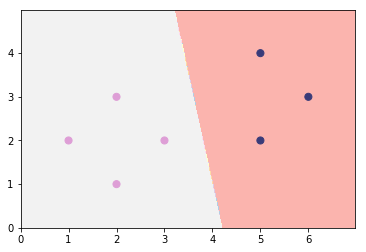

In [4]:
# Vaš kôd ovdje...
model=RidgeClassifier(alpha=0).fit(seven_X,seven_y)
print(accuracy_score(seven_y, model.predict(seven_X)))
mlutils.plot_2d_clf_problem(seven_X,seven_y,model.predict)

Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0.5`.

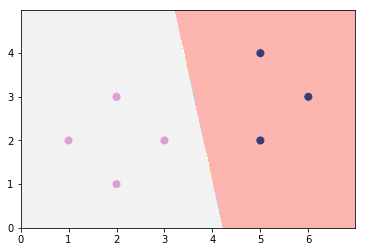

In [5]:
# Vaš kôd ovdje...
linearReg=LinearRegression().fit(seven_X,seven_y)
mlutils.plot_2d_clf_problem(seven_X,seven_y,lambda x: linearReg.predict(x)>=0.5)

**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $-1$ i $1$ umjesto $0$ i $1$?

#### (b)

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [6]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

0.875


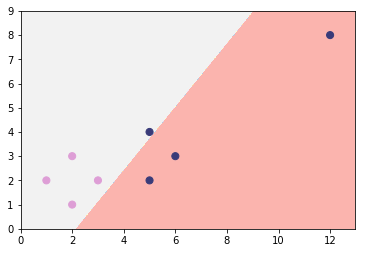

In [7]:
# Vaš kôd ovdje...
model=RidgeClassifier(alpha=0).fit(outlier_X,outlier_y)
print(accuracy_score(outlier_y, model.predict(outlier_X)))
mlutils.plot_2d_clf_problem(outlier_X,outlier_y,model.predict)

**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

#### (c)

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [8]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

0.875


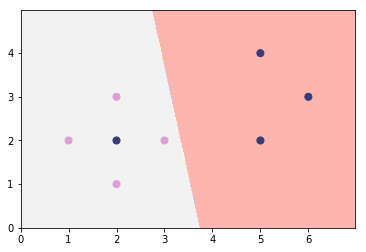

In [9]:
# Vaš kôd ovdje...
model=RidgeClassifier(alpha=0).fit(unsep_X,unsep_y)
print(accuracy_score(unsep_y, model.predict(unsep_X)))
mlutils.plot_2d_clf_problem(unsep_X,unsep_y,model.predict)

**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Argumentirajte svoj stav.

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki te da je svaka od klasa "zbijena" upravo u jednu grupu.

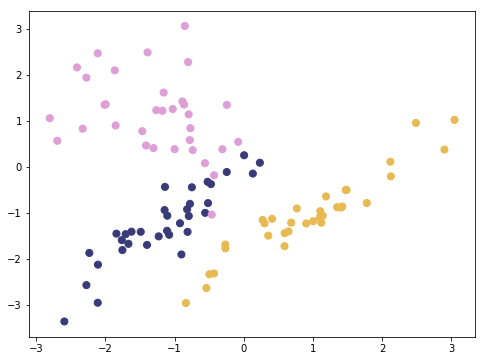

In [10]:
from sklearn.datasets import make_classification

# Vaš kôd ovdje...
multiclass_X, multiclass_y=make_classification(n_features=2, n_redundant=0, n_classes=3,n_clusters_per_class=1)
plt.figure(figsize=(8,6))
mlutils.plot_2d_clf_problem(multiclass_X,multiclass_y)

Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$  (napišite svoju funkciju `predict` koja to radi) i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema jest ona zvana **jedan-naspram-jedan** (engl, *one-vs-one*, OVO). Koja je prednost sheme OVR nad shemom OVO? A obratno?

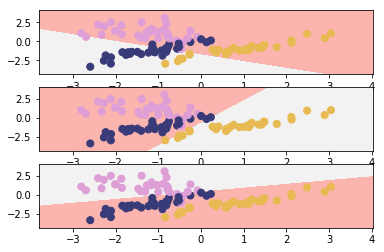

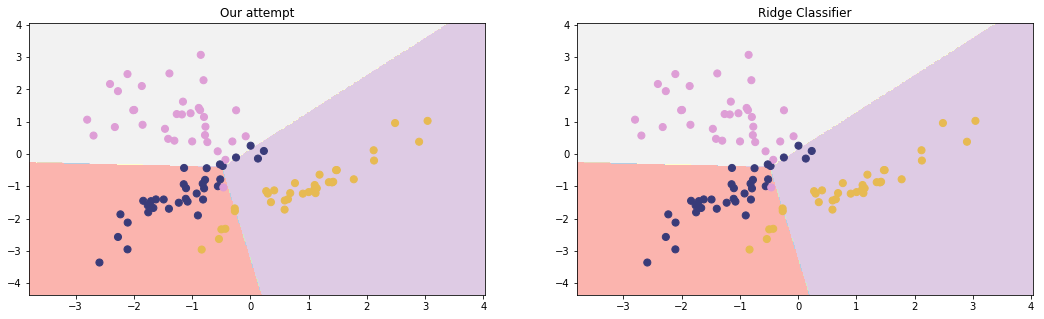

In [11]:
# Vaš kôd ovdje...
classifiers=[]
fig, (ax1) = plt.subplots(3,1)
for i in range(3):
    y=[]
    for j in multiclass_y:
        if i==j:
            y.append(1)
        else:
            y.append(0)
    model=RidgeClassifier(alpha=0).fit(multiclass_X,y)
    classifiers.append(model)
    plt.subplot(3,1,i+1)
    mlutils.plot_2d_clf_problem(multiclass_X,multiclass_y, model.predict)
plt.show()

def argmaxJhx(X):
    maxIndex=[]
    for x in X:
        reshape=x.reshape(1,-1)
        maxIndex.append([np.argmax([classifiers[0].decision_function(reshape),classifiers[1].decision_function(reshape),classifiers[2].decision_function(reshape)])])
    return np.array(maxIndex)

plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plt.title('Our attempt')
mlutils.plot_2d_clf_problem(multiclass_X,multiclass_y,argmaxJhx)

ridge=RidgeClassifier(alpha=0).fit(multiclass_X,multiclass_y)
plt.subplot(1,2,2)
plt.title('Ridge Classifier')
mlutils.plot_2d_clf_problem(multiclass_X,multiclass_y,ridge.predict)

### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

#### (a)

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

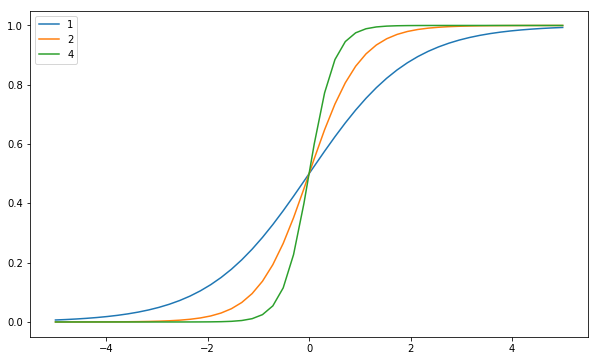

In [12]:
# Vaš kôd ovdje...
def sigm(x, alpha=1):
    return 1/(1+np.exp(-alpha*x))

plt.figure(figsize=(10,6))
alpha=[1,2,4]
x=np.linspace(-5,5)
for a in alpha:
    plt.plot(x,sigm(x,a),label=a)
plt.legend(loc='best')

**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o normi vektora težina $\mathbf{w}$)?

#### (b)

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor regularizacije.

Preporučamo definiranje pomoćne funkcije `lr_h(x,w)` koja daje predikciju za primjer `x` uz zadane težine `w`. Također, preporučamo i funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` uz te iste težine.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu.

In [56]:
# Vaš kôd ovdje...
from sklearn.preprocessing import PolynomialFeatures
from numpy.linalg import norm
def lr_h(x,w):
    return sigm(np.dot(x,w.transpose()))

def cross_entropy_error(X,y,w, alpha=0):
    sum=0
    h=lr_h(X,w)
    for i in range(len(y)):
        sum+=-y[i]*np.log(h[i])-(1-y[i])*np.log(1-h[i])
    wForRegularization=w[:,1:]
    sum+=alpha/2*norm(wForRegularization)*norm(wForRegularization)
    return sum/len(y)

def lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False):
    iteration=0
    traceMatrix=[]
    
    designMatrix=PolynomialFeatures(1).fit_transform(X)
    w=np.ndarray(shape=(1, designMatrix.shape[1]))
    for i in range(0, len(w)):
        w[i]=0
    while iteration<max_iter:
        iteration+=1
        lastError=cross_entropy_error(designMatrix,y,w)

        diff=[]
        res=lr_h(designMatrix,w)
        for i in range(len(y)):
            diff.append(res[i]-y[i])
        diff=np.array(diff)
        for i in range(len(w[0])):
            if i==0: 
                continue
            w[0,i]=w[0,i]*(1-eta*alpha)
        
        matrixMul=diff.T.dot(designMatrix)
        w-=eta*matrixMul
            
        currentError=cross_entropy_error(designMatrix,y,w)
        if trace:
            traceMatrix.append(np.copy(w))
        if(np.abs(lastError-currentError)<epsilon):
            break
    
    print("lr_train done after "+str(iteration)+" iterations, CEE: "+str(currentError))
    if trace:
        return w,traceMatrix
    else:
         return w
    

#### (c)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije. 

**NB:** Pripazite da modelu date dovoljan broj iteracija.

lr_train done after 947 iterations, CEE: [0.13521873]


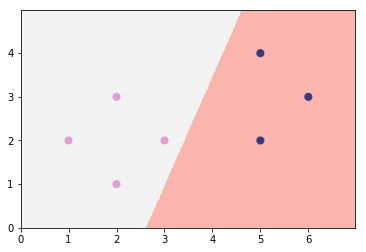

In [44]:
# Vaš kôd ovdje...
w,traceMatrix=lr_train(seven_X,seven_y,trace=True)

def decision(x):
    designMatrix=PolynomialFeatures(1).fit_transform(x)
    return lr_h(designMatrix,w)>=0.5

plt.figure(figsize=(6,4))
mlutils.plot_2d_clf_problem(seven_X,seven_y,decision)

**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

#### (d)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

lr_train done after 1142 iterations, CEE: [0.18842638]
lr_train done after 947 iterations, CEE: [0.13521873]
lr_train done after 511 iterations, CEE: [0.06379986]
lr_train done after 378 iterations, CEE: [0.04604471]


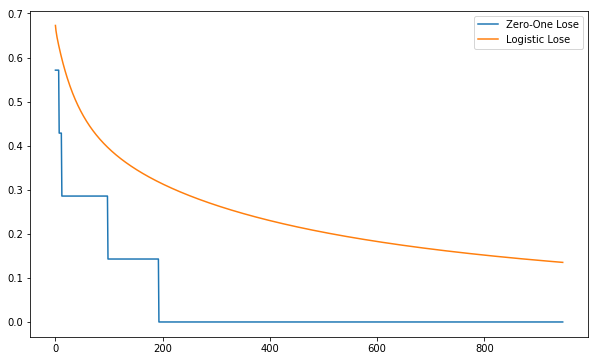

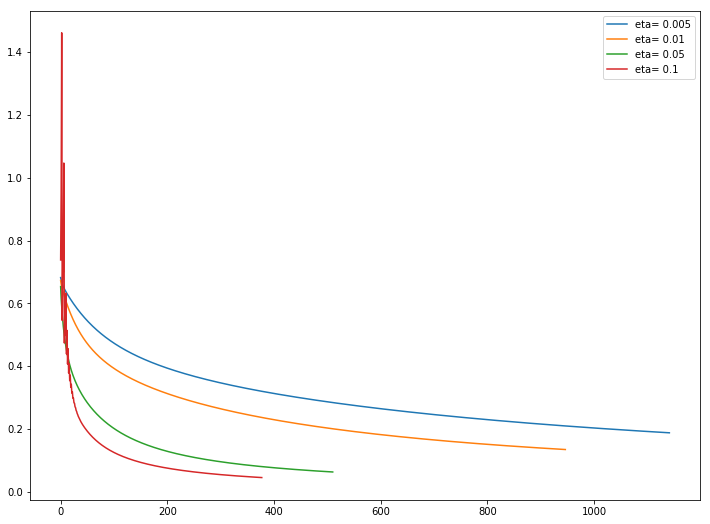

In [15]:
# Vaš kôd ovdje...
zeroOneLose=[]
logisticLose=[]
designMatrix=PolynomialFeatures(1).fit_transform(seven_X)
for w in traceMatrix:
    yPredict=[]
    h=lr_h(designMatrix,w)
    for x in h:
        if(x>=0.5):
            yPredict.append(1)
        else:
            yPredict.append(0)
    zeroOneLose.append(1-accuracy_score(seven_y,yPredict))
    logisticLose.append(cross_entropy_error(designMatrix,seven_y,w))

plt.figure(figsize=(10,6))
plt.plot(range(len(traceMatrix)), zeroOneLose, label="Zero-One Lose")
plt.plot(range(len(traceMatrix)), logisticLose, label="Logistic Lose")
plt.legend(loc='best')

eta=[0.005,0.01,0.05,0.1]
plt.figure(figsize=(12,9))
for e in eta:
    weight, traceMatrix=lr_train(seven_X, seven_y, trace=True, eta=e)
    logisticLose=[]
    for w in traceMatrix:
        logisticLose.append(cross_entropy_error(designMatrix,seven_y,w))
    plt.plot(range(len(traceMatrix)), logisticLose, label="eta= "+str(e))
plt.legend(loc='best')


**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

#### (e)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije verzije optimizacije funkcije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale. Ponovno, pripazite na broj iteracija i snagu regularizacije.

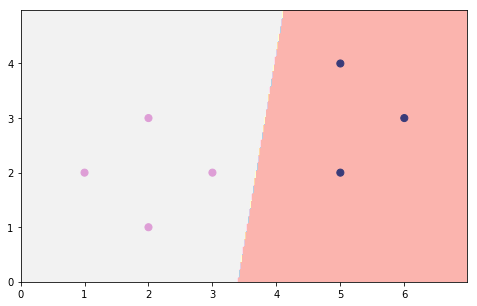

In [16]:
from sklearn.linear_model import LogisticRegression

# Vaš kôd ovdje...
plt.figure(figsize=(8,5))
logRegresion=LogisticRegression(C=100).fit(seven_X, seven_y)
mlutils.plot_2d_clf_problem(seven_X, seven_y, logRegresion.predict)

### 4. Analiza logističke regresije

#### (a)

Koristeći ugrađenu implementaciju logističke regresije, provjerite kako se logistička regresija nosi s vrijednostima koje odskaču. Iskoristite skup `outlier` iz prvog zadatka. Prikažite granicu između klasa.

**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

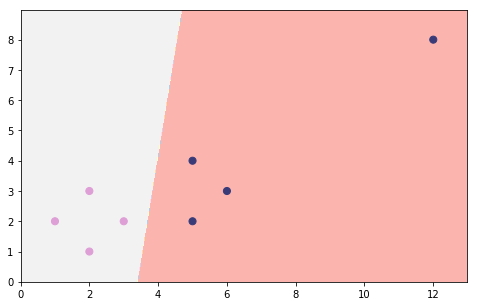

In [17]:
# Vaš kôd ovdje...
plt.figure(figsize=(8,5))
logRegresion=LogisticRegression(C=100).fit(outlier_X, outlier_y)
mlutils.plot_2d_clf_problem(outlier_X, outlier_y, logRegresion.predict)

#### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.


lr_train done after 947 iterations, CEE: [0.13521873]
[1 1 1 1 0 0 0]


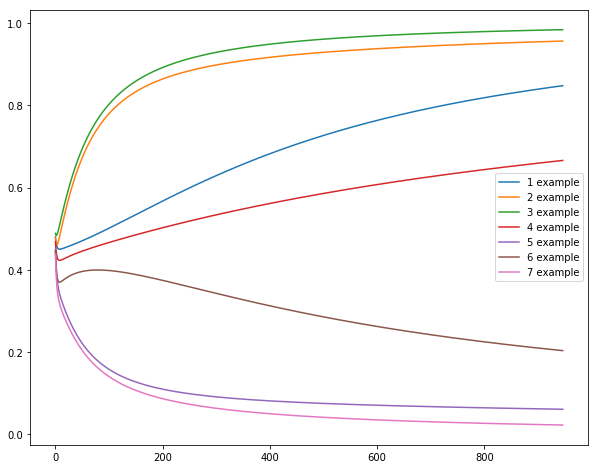

<Figure size 432x288 with 0 Axes>

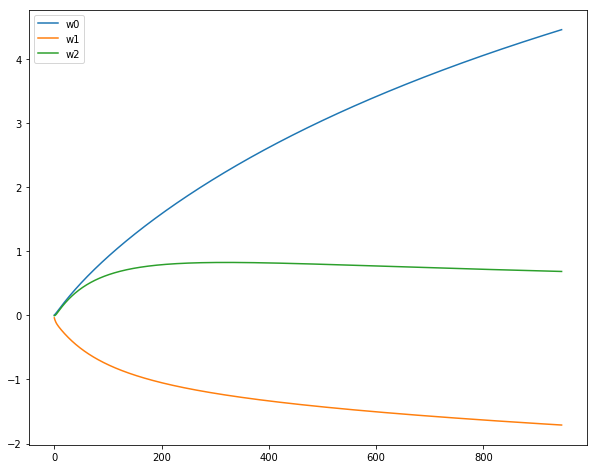

In [18]:
# Vaš kôd ovdje...
w, traceMatrix= lr_train(seven_X,seven_y,trace=True)
designMatrix=PolynomialFeatures(1).fit_transform(seven_X)

plt.figure(figsize=(10,8))
h=[[] for i in range(len(seven_X))]
w0=[]
w1=[]
w2=[]
for i in range(len(seven_X)):
    for currentW in traceMatrix:
        h[i].append(lr_h(designMatrix[i],currentW))
    plt.plot(range(len(traceMatrix)),h[i], label=str(i+1) +" example")
print(seven_y)
plt.legend()

for currentW in traceMatrix:
        w0.append(np.copy(currentW[0][0]))
        w1.append(np.copy(currentW[0][1]))
        w2.append(np.copy(currentW[0][2]))
plt.figure()
plt.figure(figsize=(10,8))
plt.plot(range(len(traceMatrix)),w0, label="w0")
plt.plot(range(len(traceMatrix)),w1, label="w1")
plt.plot(range(len(traceMatrix)),w2, label="w2")
plt.legend()

#### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep` iz prvog zadatka.

**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

lr_train done after 454 iterations, CEE: [0.40635268]
[1 1 1 1 0 0 0 0]


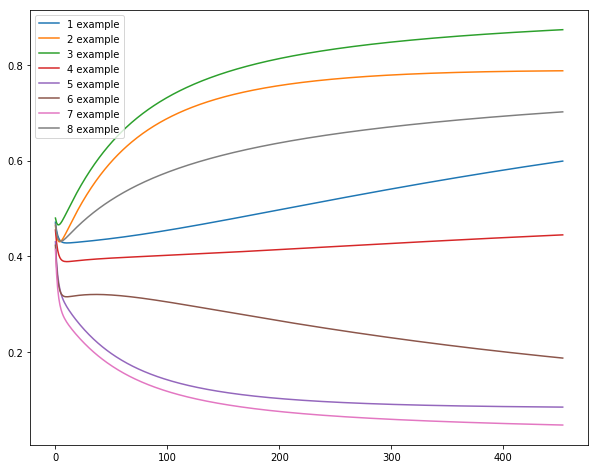

<Figure size 432x288 with 0 Axes>

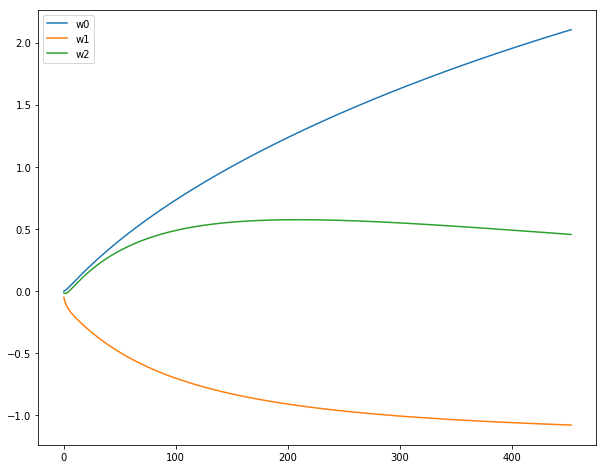

In [19]:
# Vaš kôd ovdje...
w, traceMatrix= lr_train(unsep_X,unsep_y,trace=True)
designMatrix=PolynomialFeatures(1).fit_transform(unsep_X)

plt.figure(figsize=(10,8))
h=[[] for i in range(len(unsep_X))]
w0=[]
w1=[]
w2=[]
for i in range(len(unsep_X)):
    for currentW in traceMatrix:
        h[i].append(lr_h(designMatrix[i],currentW))
    plt.plot(range(len(traceMatrix)),h[i], label=str(i+1) +" example")
print(unsep_y)
plt.legend()

for currentW in traceMatrix:
        w0.append(np.copy(currentW[0][0]))
        w1.append(np.copy(currentW[0][1]))
        w2.append(np.copy(currentW[0][2]))
plt.figure()
plt.figure(figsize=(10,8))
plt.plot(range(len(traceMatrix)),w0, label="w0")
plt.plot(range(len(traceMatrix)),w1, label="w1")
plt.plot(range(len(traceMatrix)),w2, label="w2")
plt.legend()

### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite na dva odvojena grafikona (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

In [20]:
from numpy.linalg import norm

lr_train done after 947 iterations, CEE: [0.13521873]
lr_train done after 804 iterations, CEE: [0.20193263]
lr_train done after 405 iterations, CEE: [0.43270691]
lr_train done after 4 iterations, CEE: [0.6741678]


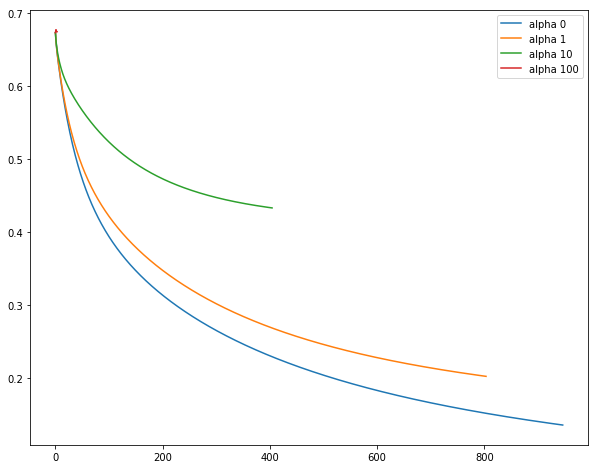

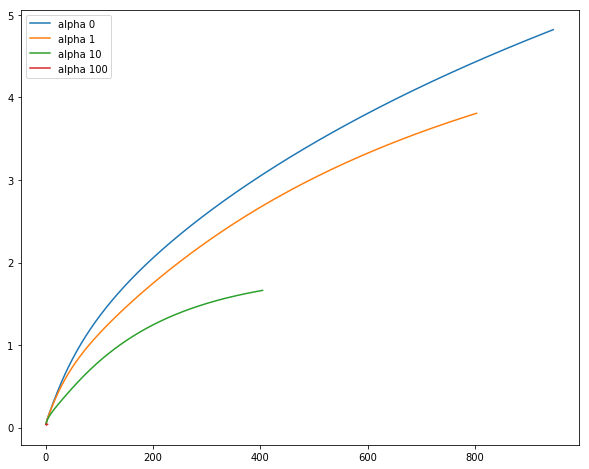

In [61]:
# Vaš kôd ovdje...
alphas=[0,1,10,100]
plt.figure(figsize=(10,8))
normes=[]
leng=[]
for a in alphas:
    w, traceMatrix= lr_train(seven_X,seven_y,trace=True,alpha=a)
    designMatrix=PolynomialFeatures(1).fit_transform(seven_X)
    error=[]
    norme=[]
    for currentW in traceMatrix:
        error.append(np.copy(cross_entropy_error(designMatrix,seven_y,currentW)))
        norme.append(norm(currentW))
    plt.plot(range(len(traceMatrix)),error, label="alpha "+str(a))
    normes.append(norme)
    leng.append(len(traceMatrix))
plt.legend()

plt.figure(figsize=(10,8))
for i in range(len(alphas)):
    plt.plot(range(leng[i]),normes[i], label="alpha "+str(alphas[i]))
plt.legend() 

### 6. Logistička regresija s funkcijom preslikavanja

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u prvoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

In [22]:
from sklearn.preprocessing import PolynomialFeatures

#poly = PolynomialFeatures(2)
#...
#mlutils.plot_2d_clf_problem(X, y, lambda x : model.predict(poly.transform(x))

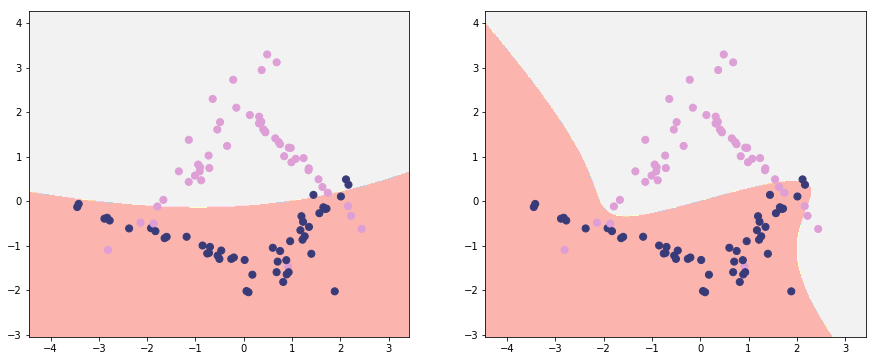

In [23]:
# Vaš kôd ovdje...
X, y = make_classification( n_features=2, n_redundant=0, n_clusters_per_class=2)
poly=PolynomialFeatures(2)
designMatrix=poly.fit_transform(X)
model = LogisticRegression(C=1).fit(designMatrix, y)
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
mlutils.plot_2d_clf_problem(X, y, lambda x : model.predict(poly.transform(x)))

poly=PolynomialFeatures(3)
designMatrix=poly.fit_transform(X)
model = LogisticRegression(C=1).fit(designMatrix, y)
plt.subplot(1,2,2)
mlutils.plot_2d_clf_problem(X, y, lambda x : model.predict(poly.transform(x)))
plt.show()

**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?